In [1]:
from proj1_helpers import *
from implementations import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read train_y=LABELS, train_x=FEATURES and train_id=EVENT_IDS from dataset.
subsamp = False
y, x, id_ = load_csv_data('../data/train.csv', sub_sample=subsamp)
y_out_test, x_out_test, id_out_test = load_csv_data('../data/test.csv', sub_sample=subsamp)

In [9]:
def plot_distributions(x):
    plt.figure(figsize=(10,5))
    for i in range(x.shape[1]):
        plt.hist(x[:,i], bins =50)
    

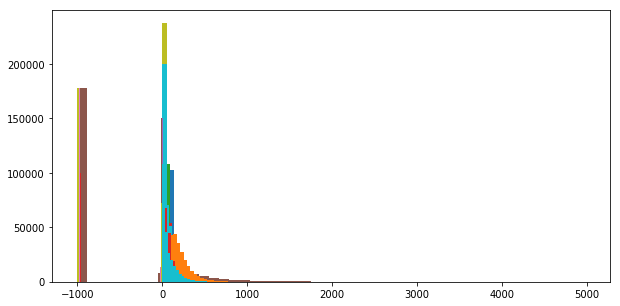

In [10]:
plot_distributions(x)

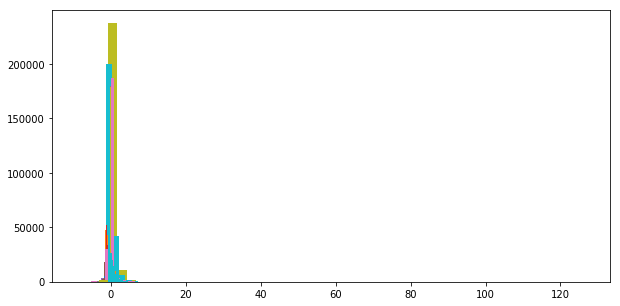

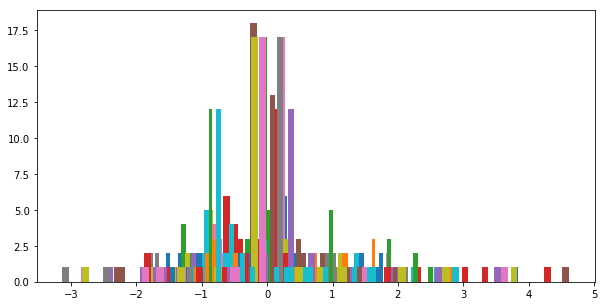

In [82]:
clean=True
degree = 1
x_train, y_train, x_test, y_test = split_data(x, y, ratio=0.9999, seed = 42)
if clean:
    # Clean data
    y_train, x_train = clean_data(y_train, x_train)
    y_test, x_test = clean_data(y_test, x_test)
# Standardize data
x_train_std = standardize_features(x_train)
x_test_std = standardize_features(x_test)
x_train = x_train_std[0]
x_test = x_test_std[0]
plot_distributions(x_train)
plot_distributions(x_test)

In [83]:
covariance_matrix = np.cov(x_train.T)
print(covariance_matrix.shape)

(30, 30)


In [84]:
eigenval, eigenvect = np.linalg.eig(covariance_matrix)
rank_eigenvals = sorted(eigenval, reverse=True)

In [85]:
pairs = {val:vect for val, vect in zip(eigenval, eigenvect)}

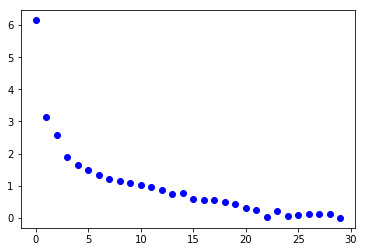

In [93]:
plt.plot(eigenval, 'ob')

In [97]:
diagonal2original = np.vstack(eigenvect) # The matrix formed by the eigenvectors of Cov in the original basis, takes vectors in the diagonal basis and represents them in the original one.
# That is of course the matrix that diagonalizes Cov
covmat_diag = np.linalg.inv(diagonal2original).dot(covariance_matrix.dot(diagonal2original))


In [98]:
# I mean feature vectors as the vectors that contain all features for a single observation (perhaps I should call them observations.)
# Then the new feature vectors (organized in the new feature matrix ) are given by the inverse of the change of basis times the original feature vectors.
new_x_test = (np.linalg.inv(diagonal2original).dot(x_test.T)).T